### TSF Assignment - Rose Dataset

1. Read the data as an appropriate Time Series data and plot the data.
2
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
5
3. Split the data into training and test. The test data should start in 1991.
2
4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
16
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
3
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
8
7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8
8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
2
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
3
10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
5
Quality of Business Report
6

In [397]:
# First of all we will import all the necessary libraries like Pandas, Numpy, seaborn, os to set the path, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [398]:
# pip install statsmodels
import statsmodels

In [399]:
statsmodels.__version__

'0.12.2'

In [400]:
# pip install statsmodels

In [401]:
# statsmodels.__version__

In [402]:
# pip install statsmodels==0.12.2

In [403]:
# Import os to set the working directory
import os

In [404]:
# After setting the path we will import Rose dataset
os.chdir('C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Time Series Forecasting\\Assignment_TSF')
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Time Series Forecasting\\Assignment_TSF'

## 1 .Read the data as an appropriate Time Series data and plot the data. 2

In [405]:
# Read the dataset
df_rose=pd.read_csv('Rose.csv')

In [406]:
# Head command to see first 5 rows
df_rose.head()

,YearMonth,Rose
0,1980-01,112.00
1,1980-02,118.00
2,1980-03,129.00
3,1980-04,99.00
4,1980-05,116.00


In [407]:
# Last 5 rows
df_rose.tail()

,YearMonth,Rose
182,1995-03,45.00
183,1995-04,52.00
184,1995-05,28.00
185,1995-06,40.00
186,1995-07,62.00


In [408]:
# Check for the Null Values
df1=df_rose.isnull()

In [409]:
# Row number 174 and 175 have Null values, we have to impute these values
df_rose[df1['Rose']]

,YearMonth,Rose
174,1994-07,nan
175,1994-08,nan


In [410]:
# Shape of the series data
df_rose.shape

(187, 2)

In [411]:
# The data has 187 rows and 2 Columns.so we have 187 Months data present.

In [412]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [413]:
# df_rose['Rose']=df_rose.astype({"Rose": int})

In [414]:
## Here we make an assumption that the date starts and ends as mentioned below

date = pd.date_range(start='15/1/1980', end='15/08/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [415]:
# Creating a new column as Time_Stamp.Adding the time stamp to the data frame
df_rose['Time_Stamp'] = pd.DataFrame(date)
df_rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.00,1980-01-31
1,1980-02,118.00,1980-02-29
2,1980-03,129.00,1980-03-31
3,1980-04,99.00,1980-04-30
4,1980-05,116.00,1980-05-31


In [416]:
# Here we will drop the Column YearMonth and Will make Index column as Time_Stamp

In [417]:
df_rose=df_rose.drop(columns = 'YearMonth',axis=1)

In [418]:
df_rose.set_index('Time_Stamp',inplace=True)

In [419]:
df_rose.head()

,Rose
Time_Stamp,
1980-01-31,112.00
1980-02-29,118.00
1980-03-31,129.00
1980-04-30,99.00
1980-05-31,116.00


In [420]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

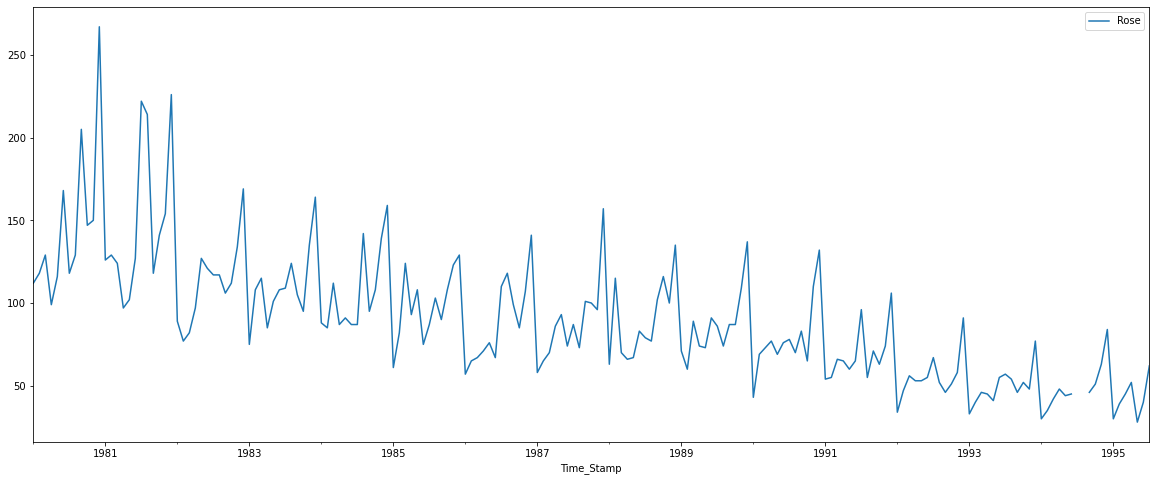

In [421]:
df_rose.plot()

In [422]:
# From Above plot we vcan see that Data has Negative Trend, Seasonality, 
# In between 1994 and 1995 2 readings missing.so the continuity has missed.

In [423]:
df_rose.head(177)

,Rose
Time_Stamp,
1980-01-31,112.00
1980-02-29,118.00
1980-03-31,129.00
1980-04-30,99.00
1980-05-31,116.00
...,...
1994-05-31,44.00
1994-06-30,45.00
1994-07-31,nan


In [424]:
# July, August 1994 has Missing values we will use Forward fill

In [425]:
# treated missing values here by using Forward Filling

In [426]:
 df_rose=df_rose.ffill()

In [427]:
# In the dataframe we can see that two missing values are imputed by using Forward filling.
df_rose.head(177)

,Rose
Time_Stamp,
1980-01-31,112.00
1980-02-29,118.00
1980-03-31,129.00
1980-04-30,99.00
1980-05-31,116.00
...,...
1994-05-31,44.00
1994-06-30,45.00
1994-07-31,45.00


In [428]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [429]:
df_rose['Rose']=df_rose.astype({"Rose": int})

In [430]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rose    187 non-null    int32
dtypes: int32(1)
memory usage: 2.2 KB


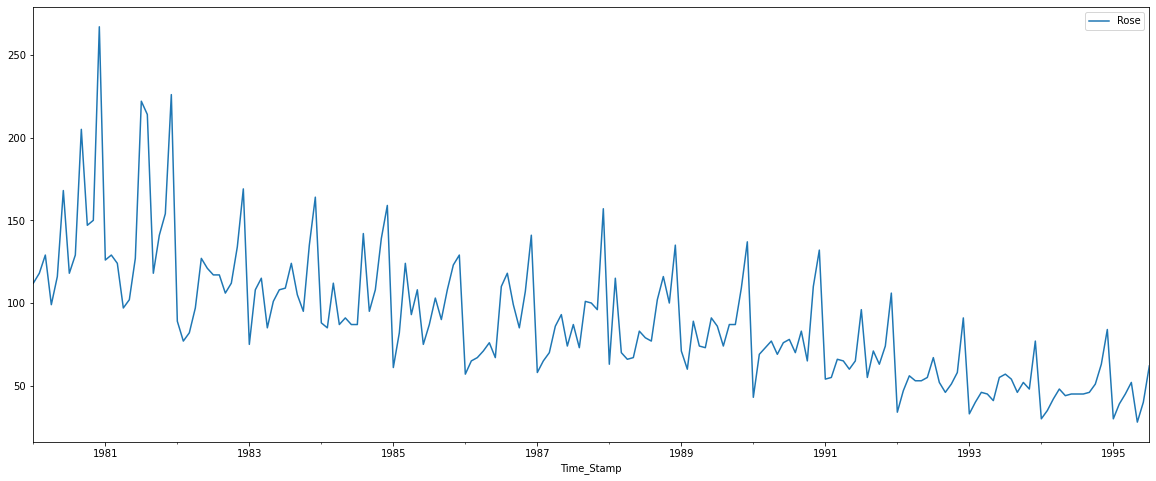

In [431]:
df_rose.plot()

In [432]:
# Now we can see Continuous plot

In [433]:
df_rose

,Rose
Time_Stamp,
1980-01-31,112
1980-02-29,118
1980-03-31,129
1980-04-30,99
1980-05-31,116
...,...
1995-03-31,45
1995-04-30,52
1995-05-31,28


## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition (5)

In [434]:
df_rose.describe()

,Rose
count,187.00
mean,89.91
std,39.24
min,28.00
25%,62.50
50%,85.00
75%,111.00
max,267.00


In [435]:
# from above describe Function we can see that Highest Sales of Rose wine is 267.Mean and Median are almost same here.

In [436]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rose    187 non-null    int32
dtypes: int32(1)
memory usage: 2.2 KB


In [437]:
# Total 187 rows we have enties from Jan 1980 to July 1995

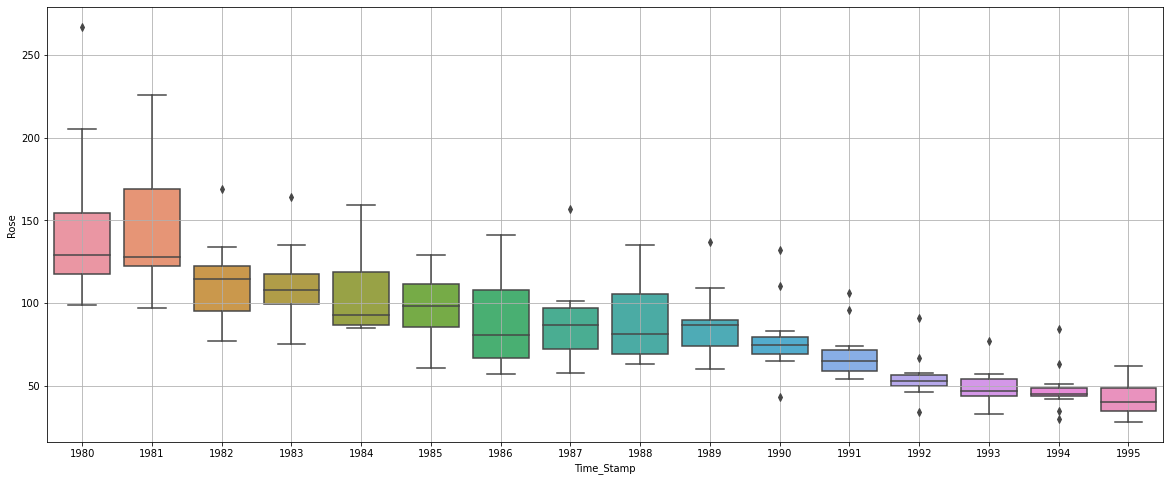

In [438]:
# Yearly plot
sns.boxplot(x=df_rose.index.year,y = df_rose['Rose'])
plt.grid();

From Yearly plot we can see that Sales of Rose wine are getting down by every year, This continuous decrease in the Sales needs a deep study.

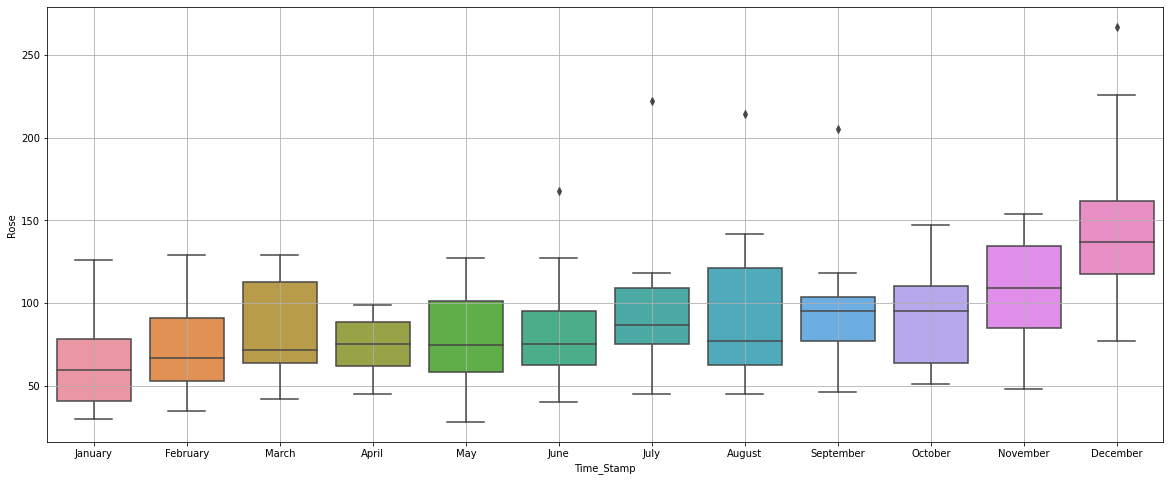

In [439]:
# Monthly plot
sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'])
plt.grid();

Here we come with interseting insights from Monthly plot, From January to October Median of Sales is almost Same. Only Sales are increasing in November and December.In This December Only Sales has Crossed figure of 250 wines.

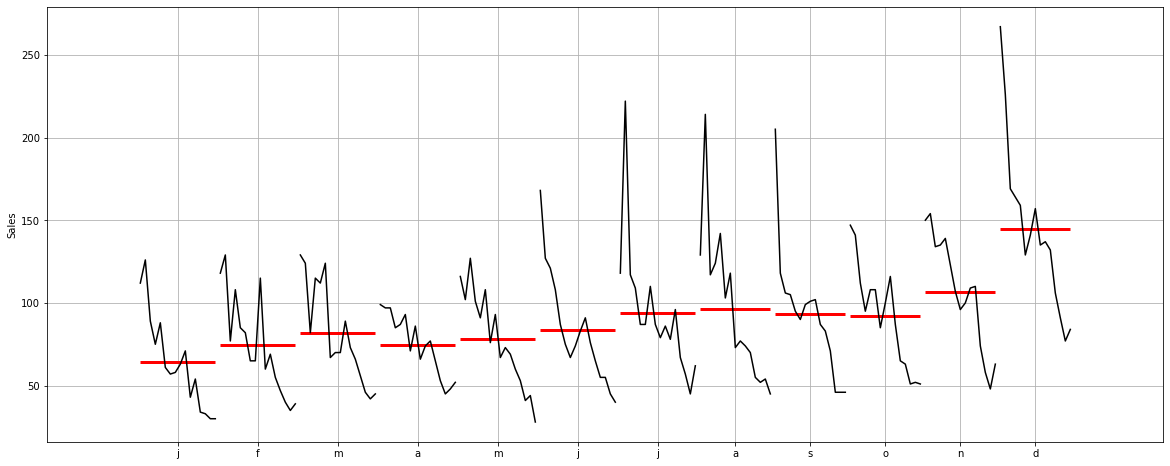

In [440]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_rose['Rose'],ylabel='Sales')
plt.grid();

In [441]:
## For colouring tables
## Visit https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html    
monthly_sales_across_years = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, index = df_rose.index.year)
monthly_sales_across_years.style.highlight_max()

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.000000,118.000000,129.000000,99.000000,116.000000,168.000000,118.000000,129.000000,205.000000,147.000000,150.000000,267.000000
1981,126.000000,129.000000,124.000000,97.000000,102.000000,127.000000,222.000000,214.000000,118.000000,141.000000,154.000000,226.000000
1982,89.000000,77.000000,82.000000,97.000000,127.000000,121.000000,117.000000,117.000000,106.000000,112.000000,134.000000,169.000000
1983,75.000000,108.000000,115.000000,85.000000,101.000000,108.000000,109.000000,124.000000,105.000000,95.000000,135.000000,164.000000
1984,88.000000,85.000000,112.000000,87.000000,91.000000,87.000000,87.000000,142.000000,95.000000,108.000000,139.000000,159.000000
1985,61.000000,82.000000,124.000000,93.000000,108.000000,75.000000,87.000000,103.000000,90.000000,108.000000,123.000000,129.000000
1986,57.000000,65.000000,67.000000,71.000000,76.000000,67.000000,110.000000,118.000000,99.000000,85.000000,107.000000,141.000000
1987,58.000000,65.000000,70.000000,86.000000,93.000000,74.000000,87.000000,73.000000,101.000000,100.000000,96.000000,157.000000
1988,63.000000,115.000000,70.000000,66.000000,67.000000,83.000000,79.000000,77.000000,102.000000,116.000000,100.000000,135.000000


1980 and 1981 are only Two years where Sales are Highest, But from this point the sales has decreased.

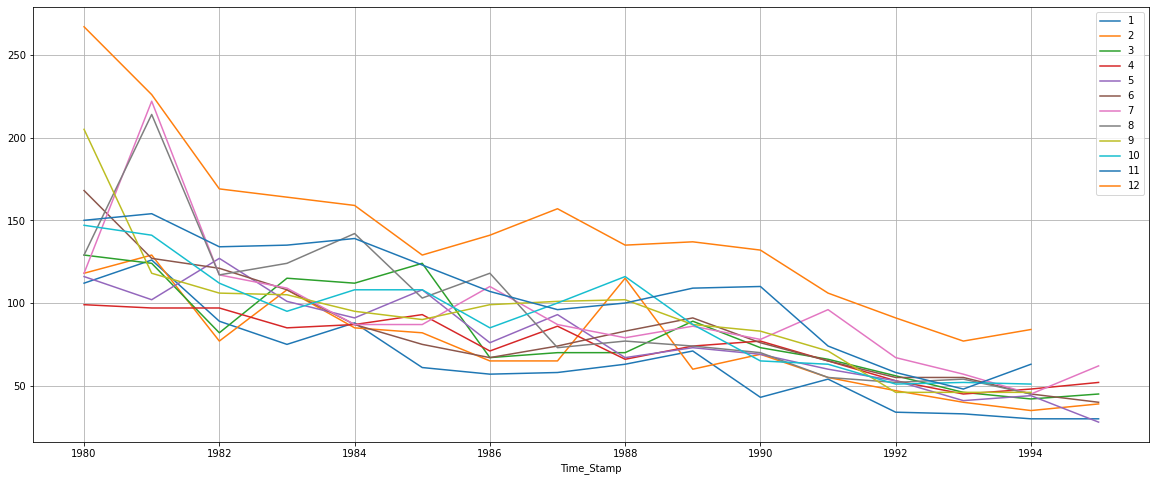

In [442]:
# The orange line is for December month, It is Alienated from Other lines.
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

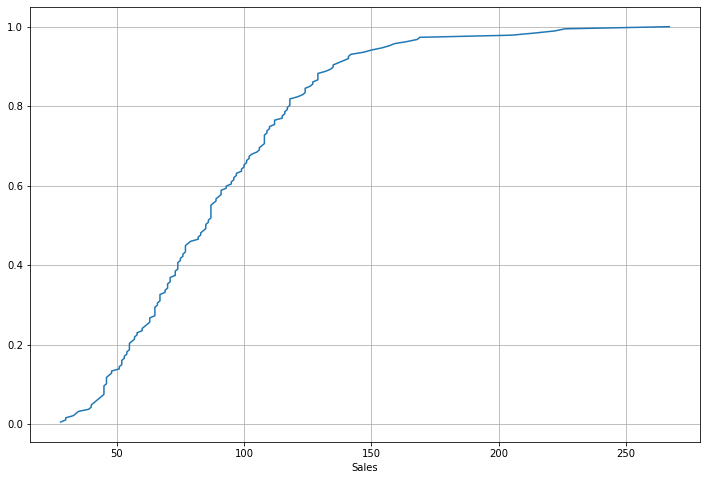

In [443]:
# Plot the Empirical Cumulative Distribution.
# statistics


from statsmodels.distributions.empirical_distribution import ECDF
statsmodels.__version__
plt.figure(figsize = (12, 8))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. 50% od the sales are below 100. Maximum sales is close 260.

#### Plot the average Sales per month and the month on month percentage change of Sales.

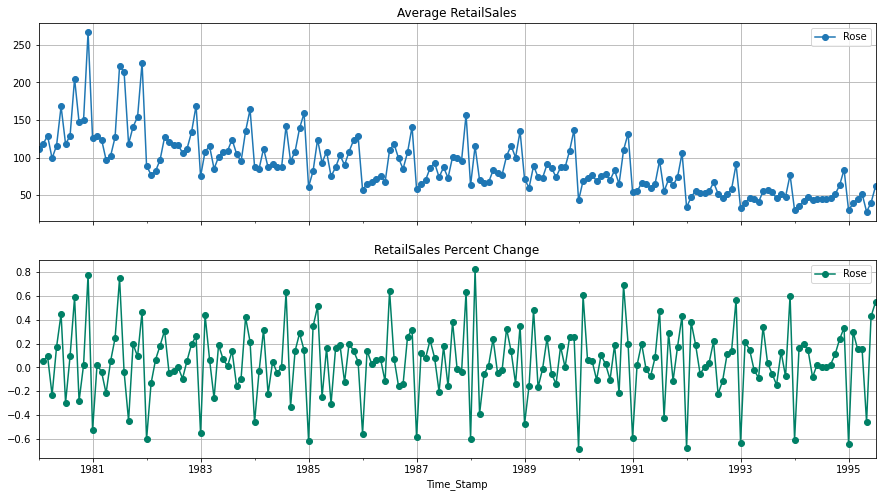

In [444]:
# group by date and get average RetailSales, and precent change
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

In This plots we can see there is drastic change at the end of every year.

### Decompose the Time Series and plot the different components.

In [445]:
# Import seasonal_decompose from statsmodels library
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

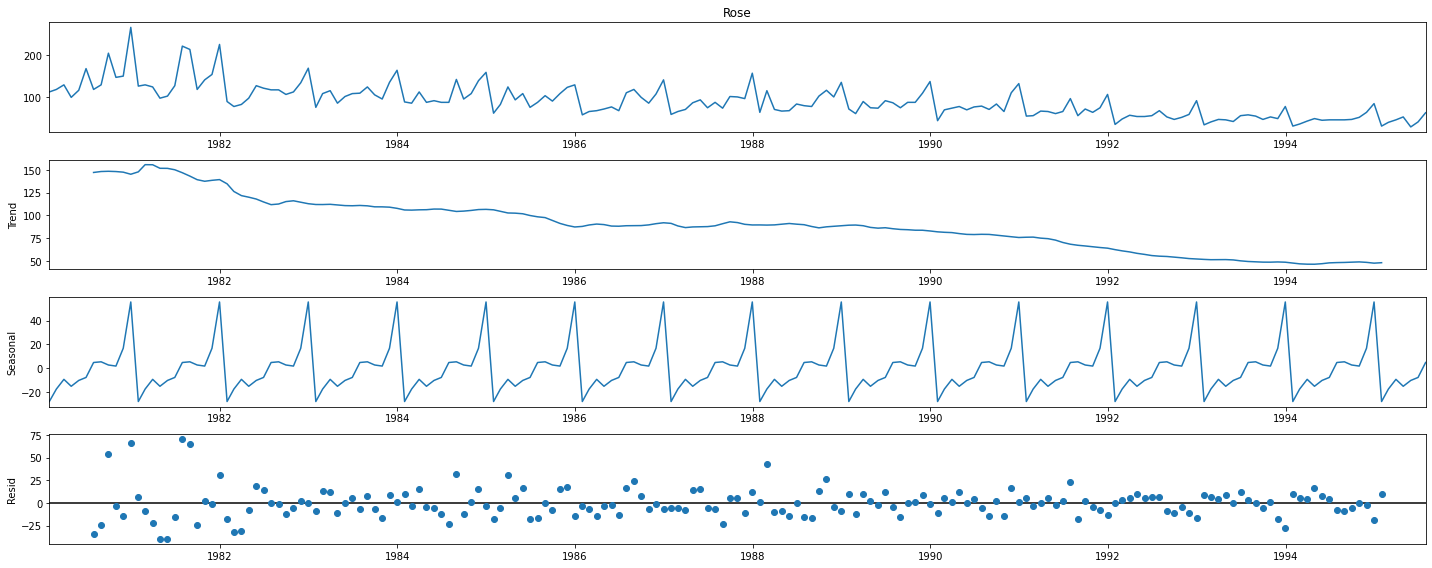

In [446]:
# Additive decomposition = Trend + Seasonality + Residual
decomposition = seasonal_decompose(df_rose['Rose'],model='additive')
decomposition.plot();

From above Additive Decomposition we can see that There is Negative trend and Seasonality is there.residuals are showing patterns, Might me missing some quality Information.

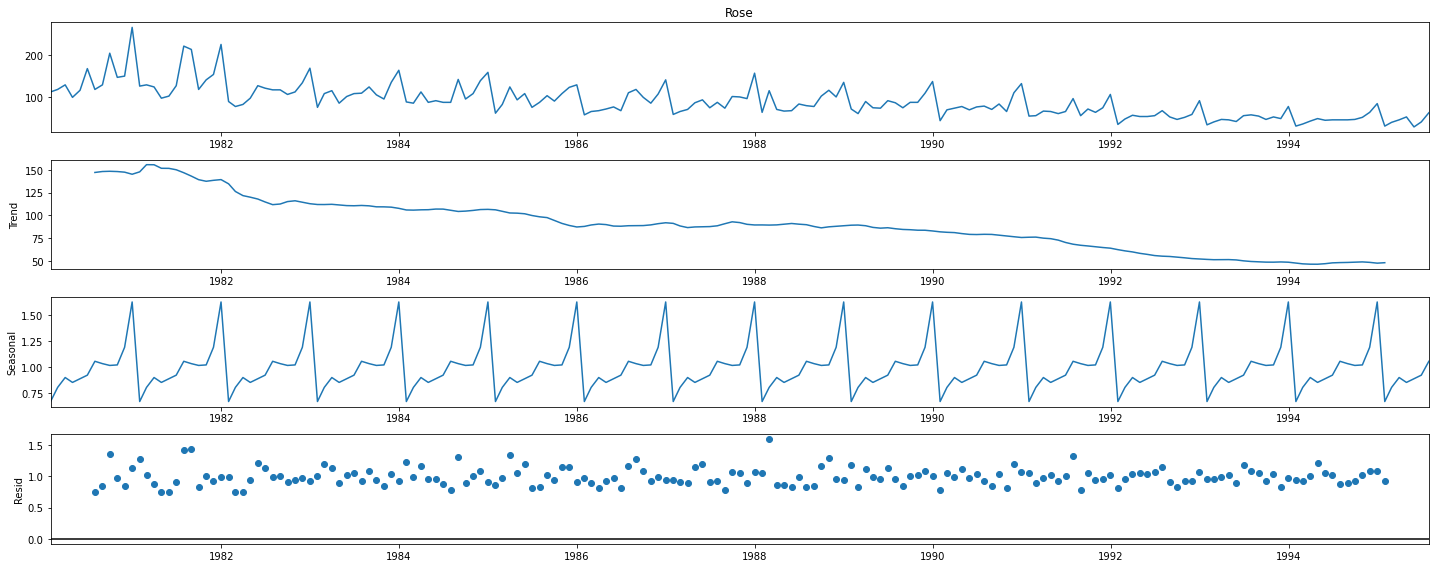

In [447]:
decomposition = seasonal_decompose(df_rose['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative decomposition series, we see that a lot of residuals are located around 1.

In [448]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

# We can see the values of trend and Seasonality for Year 1980. In Case of Seasonality it will mostly repeat and In case of 
# Trend it will keep decreasing overall.

Trend 
 Time_Stamp
1980-01-31      nan
1980-02-29      nan
1980-03-31      nan
1980-04-30      nan
1980-05-31      nan
1980-06-30      nan
1980-07-31   147.08
1980-08-31   148.12
1980-09-30   148.37
1980-10-31   148.08
1980-11-30   147.42
1980-12-31   145.12
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   0.67
1980-02-29   0.81
1980-03-31   0.90
1980-04-30   0.85
1980-05-31   0.89
1980-06-30   0.92
1980-07-31   1.06
1980-08-31   1.04
1980-09-30   1.02
1980-10-31   1.02
1980-11-30   1.19
1980-12-31   1.63
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31    nan
1980-02-29    nan
1980-03-31    nan
1980-04-30    nan
1980-05-31    nan
1980-06-30    nan
1980-07-31   0.76
1980-08-31   0.84
1980-09-30   1.36
1980-10-31   0.97
1980-11-30   0.85
1980-12-31   1.13
Name: resid, dtype: float64 



## 3. Split the data into training and test. The test data should start in 1991 (2)

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [449]:
train=df_rose[df_rose.index.year < 1991]
test=df_rose[df_rose.index.year >= 1991]

In [450]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [451]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112
1980-02-29,118
1980-03-31,129
1980-04-30,99
1980-05-31,116


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70
1990-09-30,83
1990-10-31,65
1990-11-30,110
1990-12-31,132


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54
1991-02-28,55
1991-03-31,66
1991-04-30,65
1991-05-31,60


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45
1995-04-30,52
1995-05-31,28
1995-06-30,40
1995-07-31,62


In [452]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [453]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rose    132 non-null    int32
dtypes: int32(1)
memory usage: 1.5 KB


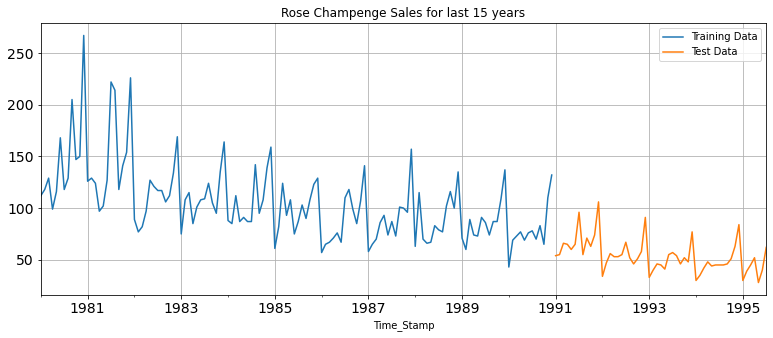

In [454]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Rose Champenge Sales for last 15 years")
plt.show()

### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

#### 1.Simple Exponential Smoothing

In [455]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [456]:
SES_train = train.copy()
SES_test = test.copy()

In [457]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [458]:
model_SES_autofit = model_SES.fit(optimized=True)

In [459]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [460]:
# Now lets predict on the test data

SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54,87.10
1991-02-28,55,87.10
1991-03-31,66,87.10
1991-04-30,65,87.10
1991-05-31,60,87.10


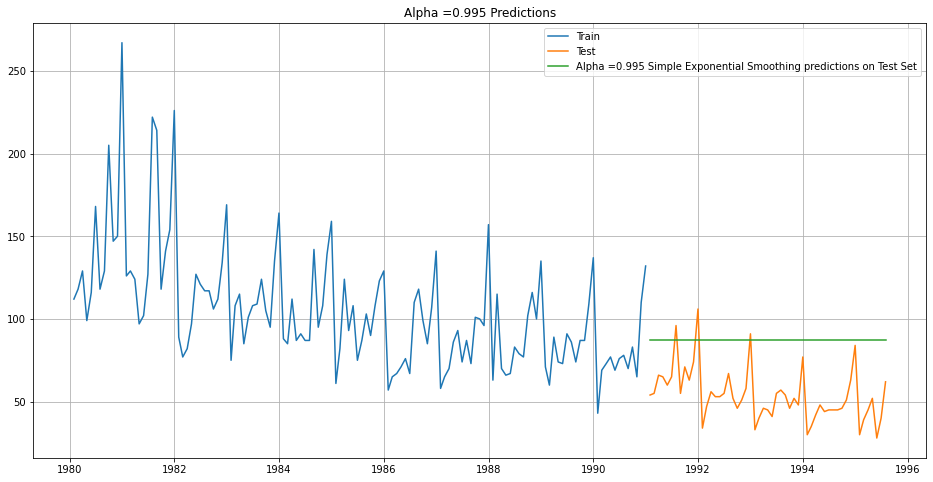

In [461]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

##### Model Evaluation for  𝛼  = 0.995 : Simple Exponential Smoothing

In [462]:
## Test Data
from sklearn import metrics
rmse_model1_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [463]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha=0.995,Simple Exponential Model'])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82


Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [464]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Train RMSE,Test RMSE


In [465]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

##### Model Evaluation

In [466]:
resultsDf_2.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.30,32.47,47.53
1,0.40,33.04,53.79
2,0.50,33.68,59.66
3,0.60,34.44,64.99
4,0.70,35.32,69.72
5,0.80,36.33,73.79
6,0.90,37.48,77.16


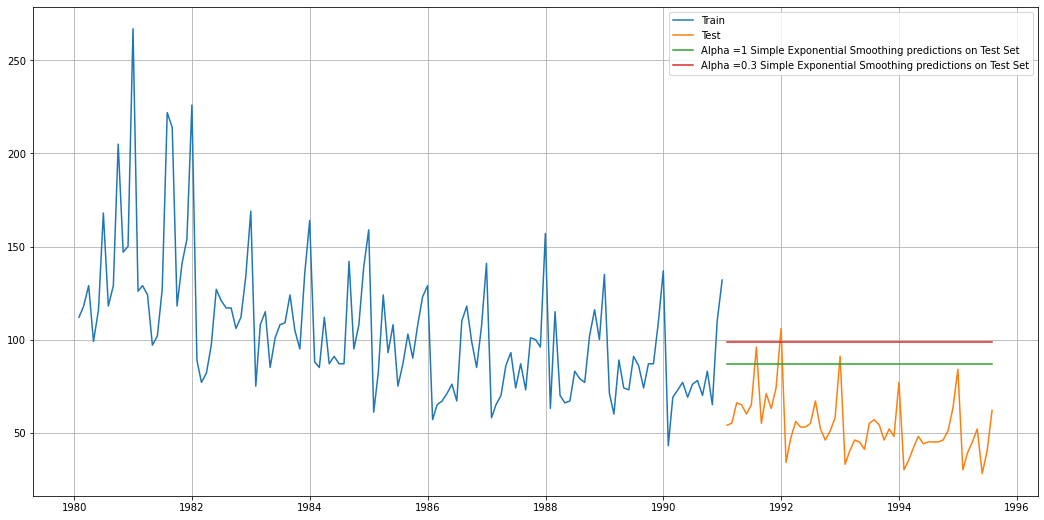

In [467]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [468]:
resultsDf_1_3 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_1_3])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53


#### Model 2 : Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.¶

In [469]:
DES_train = train.copy()
DES_test = test.copy()

In [470]:
model_DES = Holt(DES_train['Rose'])

In [471]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [472]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

In [473]:
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.30,35.94,265.59
1,0.30,0.40,37.39,358.78
2,0.30,0.50,38.89,451.83
3,0.30,0.60,40.28,536.98
4,0.30,0.70,41.40,601.64
...,...,...,...,...
59,1.00,0.60,51.83,801.70
60,1.00,0.70,54.50,841.92
61,1.00,0.80,57.37,853.99
62,1.00,0.90,60.47,834.74


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [474]:
resultsDf_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.30,35.94,265.59
8,0.40,0.30,36.75,339.33
1,0.30,0.40,37.39,358.78
16,0.50,0.30,37.43,394.30
24,0.60,0.30,38.35,439.32


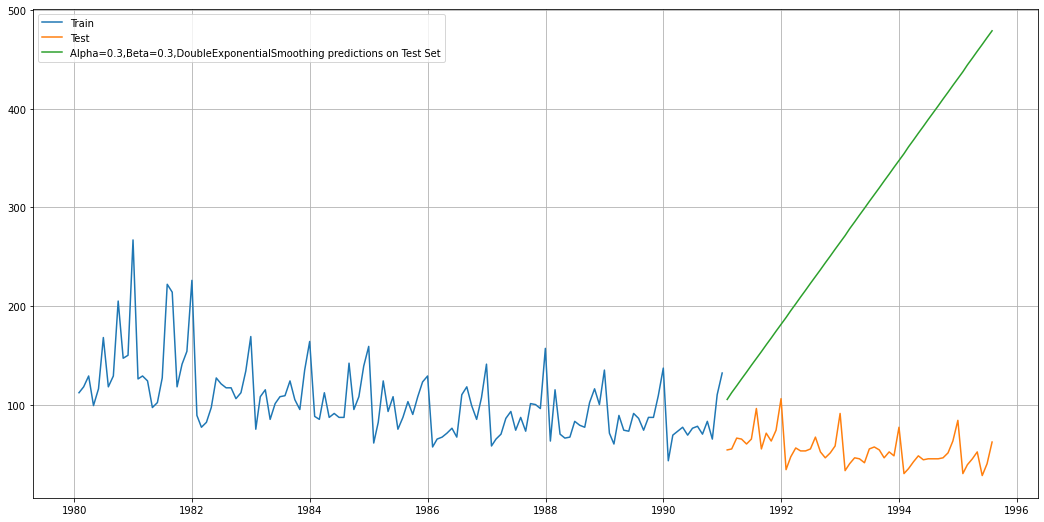

In [475]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [476]:
resultsDf_2_1 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59


#### Method 3: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [477]:
TES_train = train.copy()
TES_test = test.copy()

In [478]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [479]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [480]:
model_TES_autofit.params

{'smoothing_level': 0.06475408609774214,
 'smoothing_trend': 0.05307002085376367,
 'smoothing_seasonal': 3.0517776640274286e-08,
 'damping_trend': nan,
 'initial_level': 61.109156896449434,
 'initial_trend': -0.3800333306252026,
 'initial_seasons': array([1.84498345, 2.09357803, 2.2872201 , 1.99940217, 2.24762785,
        2.45077751, 2.6939182 , 2.86477256, 2.71790667, 2.65917328,
        3.0997045 , 4.27511796]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [481]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54,56.75
1991-02-28,55,64.20
1991-03-31,66,69.93
1991-04-30,65,60.95
1991-05-31,60,68.31


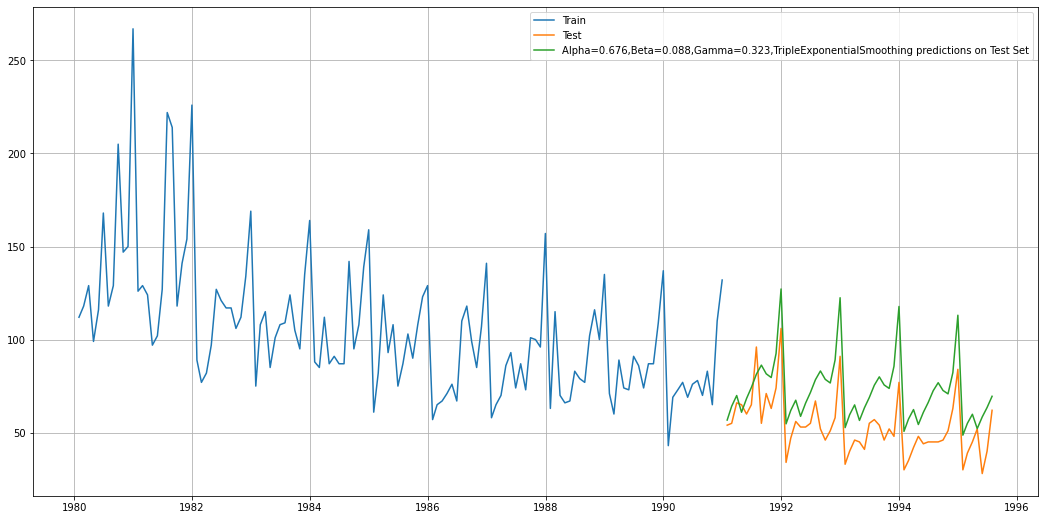

In [482]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [483]:
## Test Data

rmse_model3_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.170


In [484]:
resultsDf_3_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17


In [485]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_3_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [486]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model3_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model3_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_3_2 = resultsDf_3_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model3_train,'Test RMSE':rmse_model3_test}
                                                 , ignore_index=True)

In [487]:
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.30,0.30,0.30,27.22,19.07
1,0.30,0.30,0.40,27.40,11.19
2,0.30,0.30,0.50,27.93,30.54
3,0.30,0.30,0.60,28.89,63.60
4,0.30,0.30,0.70,30.57,122.45
...,...,...,...,...,...
507,1.00,1.00,0.60,28358.46,9603.64
508,1.00,1.00,0.70,30724.13,23029.96
509,1.00,1.00,0.80,1218.76,9626.71
510,1.00,1.00,0.90,14150.25,9691.90


In [488]:
resultsDf_3_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
8,0.30,0.40,0.30,28.11,10.95
1,0.30,0.30,0.40,27.40,11.19
69,0.40,0.30,0.80,32.60,12.61
16,0.30,0.50,0.30,29.09,14.40
131,0.50,0.30,0.60,32.14,16.70


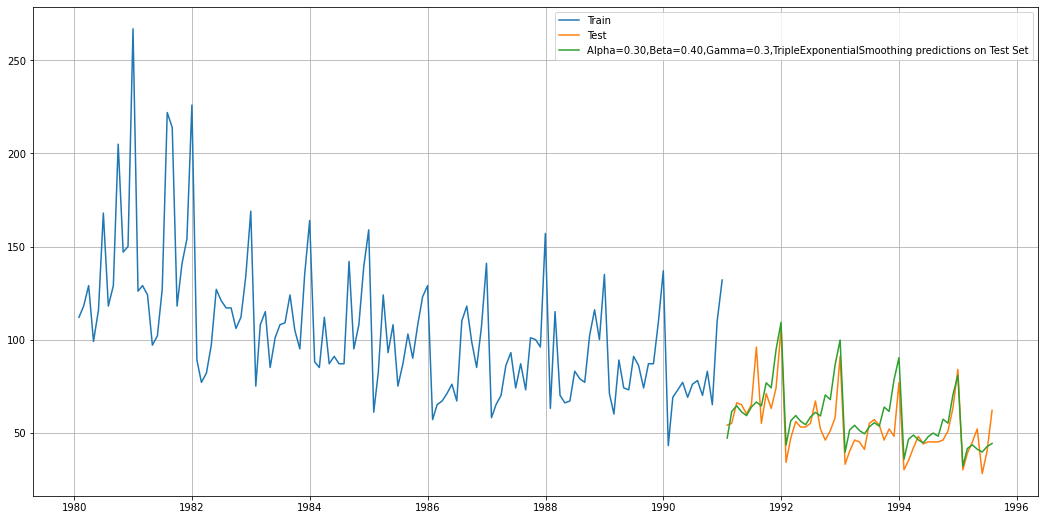

In [489]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.30, 0.40, 0.3], label='Alpha=0.30,Beta=0.40,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [490]:
resultsDf_3_2 = pd.DataFrame({'Test RMSE': [resultsDf_3_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_2])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95


In [491]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

#### Model 4: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression

In [492]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [493]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [494]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Rose  time
Time_Stamp            
1980-01-31   112     1
1980-02-29   118     2
1980-03-31   129     3
1980-04-30    99     4
1980-05-31   116     5 

Last few rows of Training Data 
             Rose  time
Time_Stamp            
1990-08-31    70   128
1990-09-30    83   129
1990-10-31    65   130
1990-11-30   110   131
1990-12-31   132   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31    54   133
1991-02-28    55   134
1991-03-31    66   135
1991-04-30    65   136
1991-05-31    60   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31    45   183
1995-04-30    52   184
1995-05-31    28   185
1995-06-30    40   186
1995-07-31    62   187 



Now that our training and test data has been modified, let us go ahead use  Linear regression  to build the model on the training data and test the model on the test data.

In [495]:
from sklearn.linear_model import LinearRegression

In [496]:
lr = LinearRegression()

In [497]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

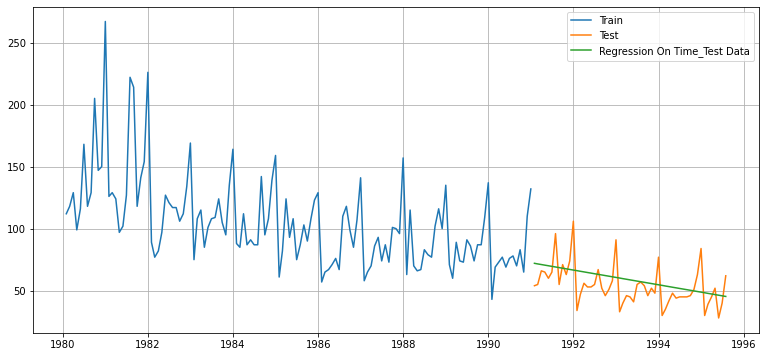

In [498]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [499]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.276


In [500]:
resultsDf_4_1 = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_4_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28


#### Model 5: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [501]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [502]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132
1991-02-28    132
1991-03-31    132
1991-04-30    132
1991-05-31    132
Name: naive, dtype: int32

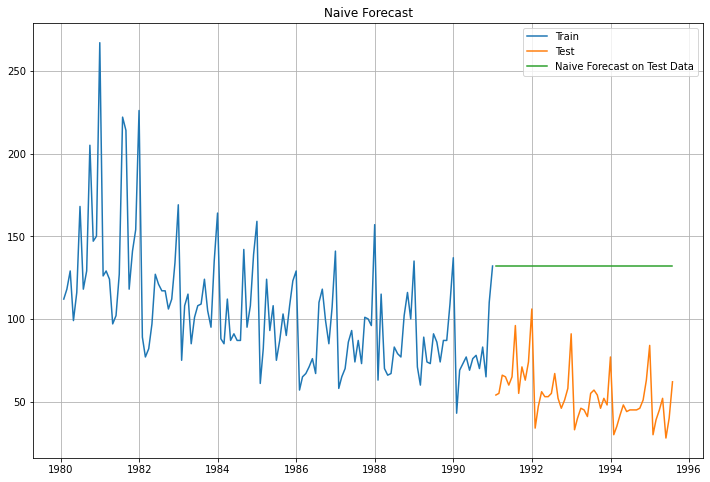

In [503]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [504]:
## Test Data - RMSE

rmse_model5_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [505]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74


#### Model 6: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [506]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [507]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54,104.94
1991-02-28,55,104.94
1991-03-31,66,104.94
1991-04-30,65,104.94
1991-05-31,60,104.94


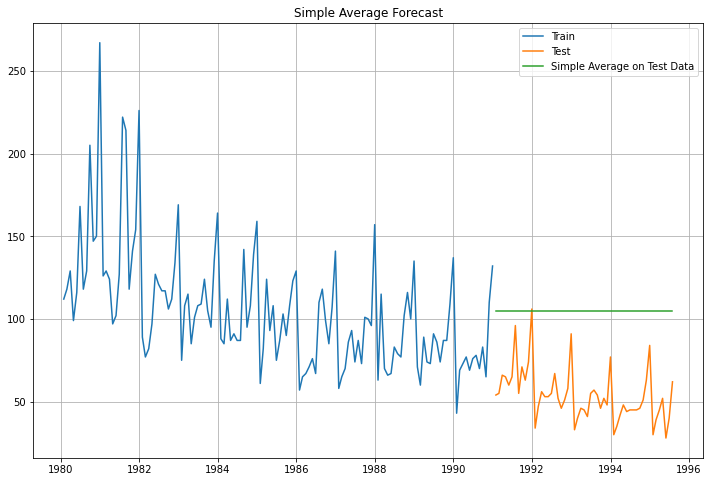

In [508]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [509]:
## Test Data - RMSE 

rmse_model6_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [510]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48


#### Model 7: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [511]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112
1980-02-29,118
1980-03-31,129
1980-04-30,99
1980-05-31,116


#### Trailing moving averages

In [512]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112,nan,nan,nan,nan
1980-02-29,118,115.00,nan,nan,nan
1980-03-31,129,123.50,nan,nan,nan
1980-04-30,99,114.00,114.50,nan,nan
1980-05-31,116,107.50,115.50,nan,nan


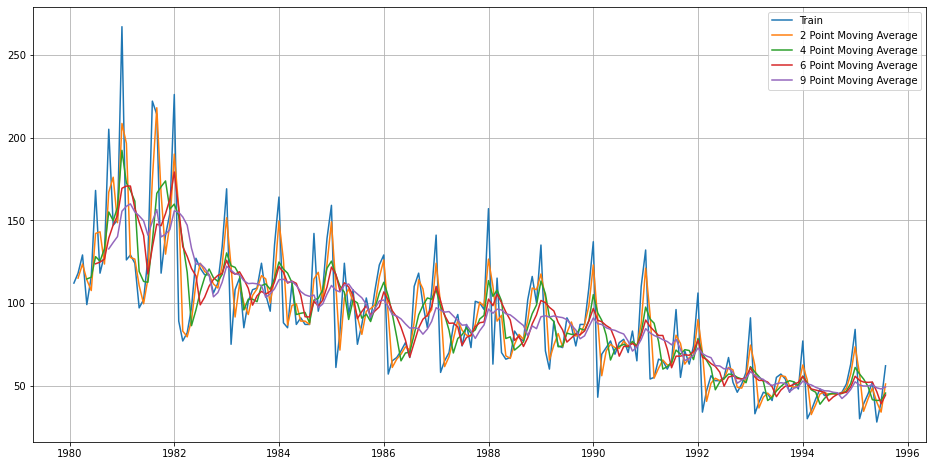

In [513]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [514]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.709677)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.709677):]

In [515]:
MovingAverage.count()

Rose          187
Trailing_2    186
Trailing_4    184
Trailing_6    182
Trailing_9    179
dtype: int64

In [516]:
trailing_MovingAverage_test.count()

Rose          55
Trailing_2    55
Trailing_4    55
Trailing_6    55
Trailing_9    55
dtype: int64

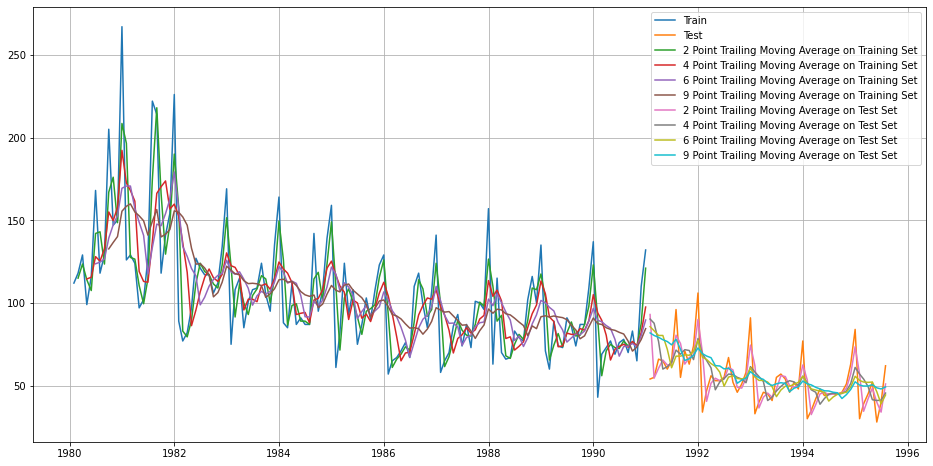

In [517]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

Done only on Test data

In [518]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model7_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model7_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model7_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model7_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model7_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


In [519]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_2,rmse_model7_test_4
                                          ,rmse_model7_test_6,rmse_model7_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


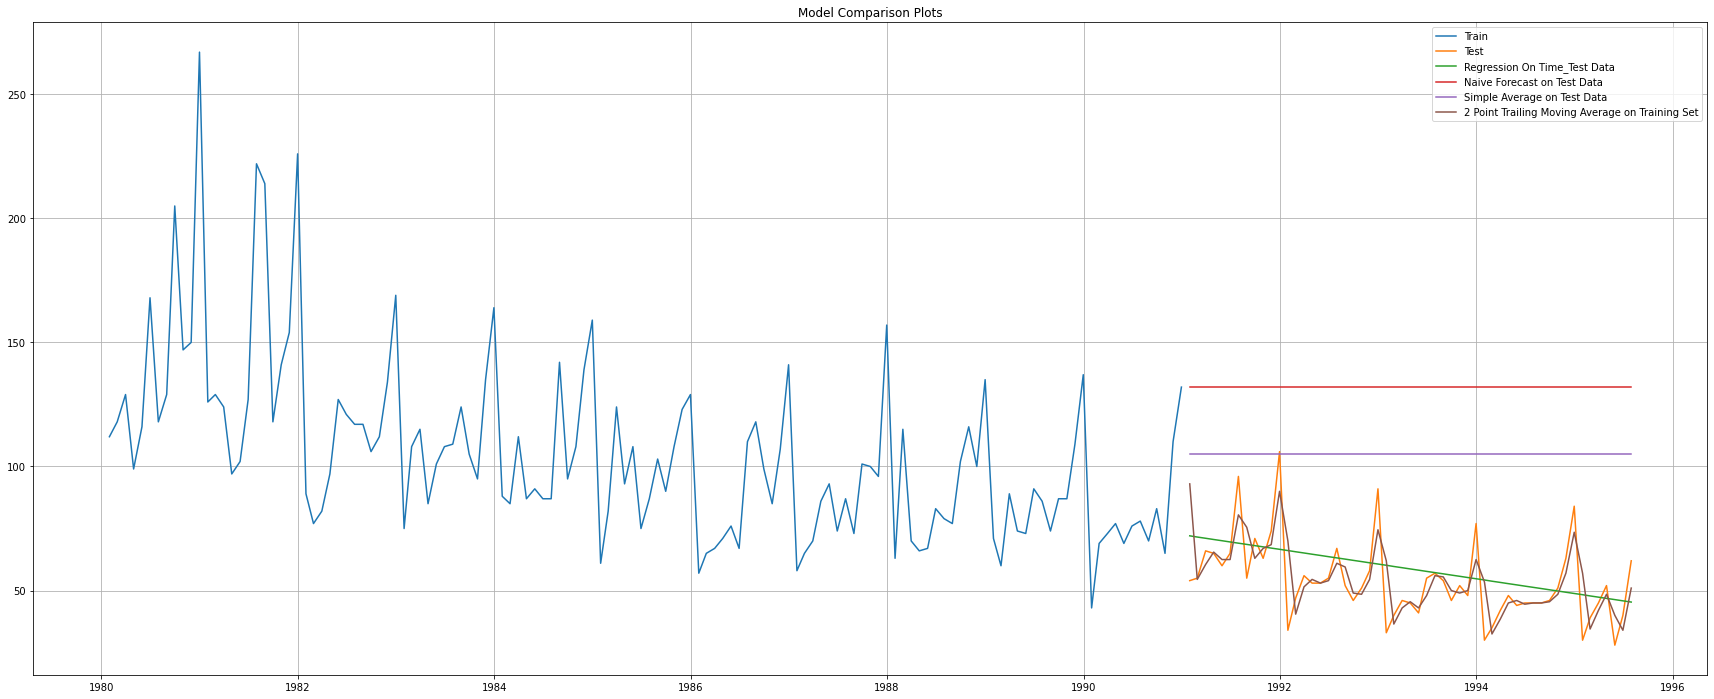

In [520]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [521]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
RegressionOnTime,15.28
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
SimpleAverageModel,53.48


### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. 

#### Check for Stationarity

Dicky Fuller Test

Null Hypothesis H0- Series is not Stationary

Alternative Hypothesis H1- Series is Stationary

In [522]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

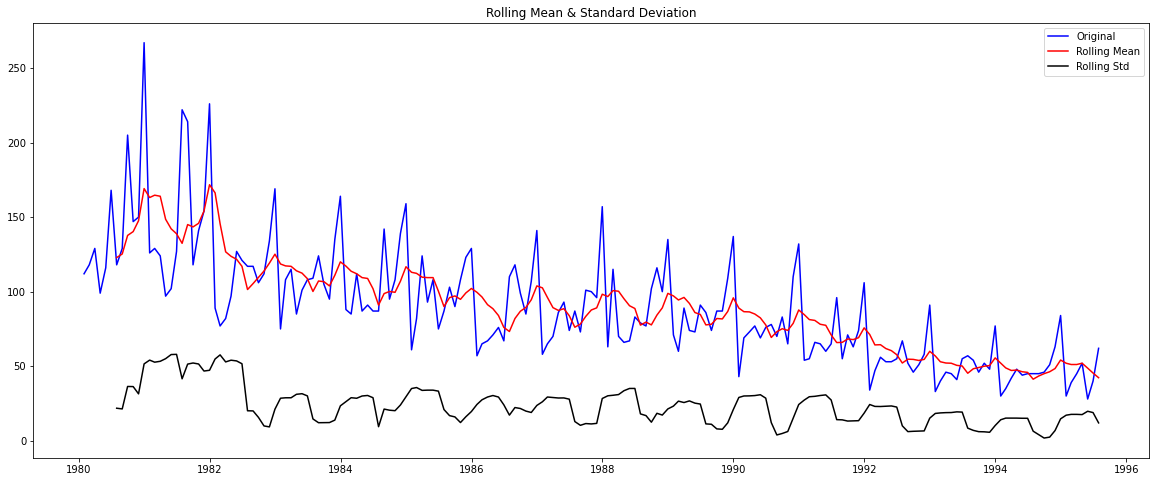

Results of Dickey-Fuller Test:
Test Statistic                 -1.87
p-value                         0.34
#Lags Used                     13.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [523]:
test_stationarity(df_rose['Rose'])

P value is higher that 0.05 Hence Null Hypothesis is True, we will take Order 1 differencing to make series stationary

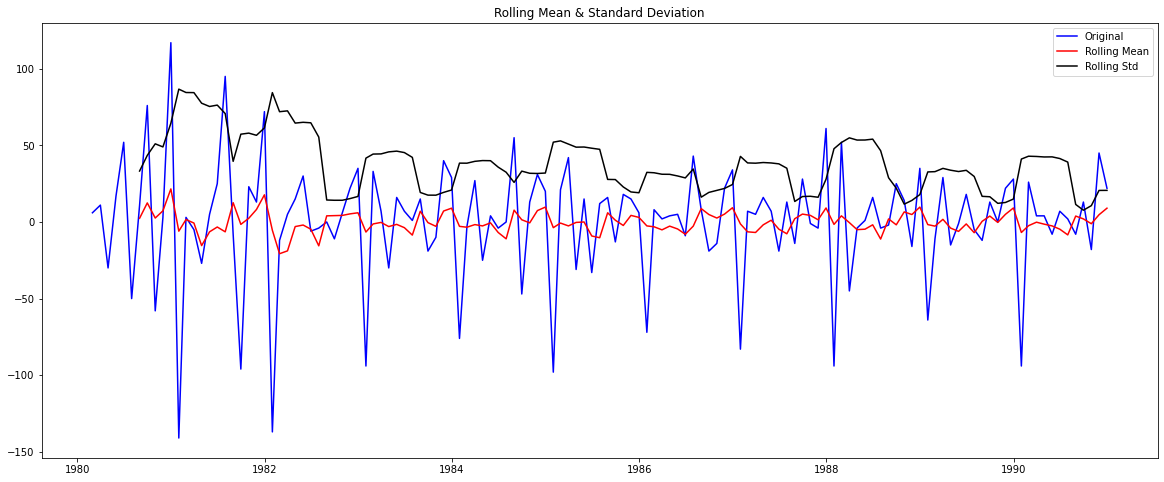

Results of Dickey-Fuller Test:
Test Statistic                 -6.59
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   118.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [524]:
# We check stationarity at initial level, but series is not stationary as P value is higher than 0.05
# difference of order 1
test_stationarity(train['Rose'].diff().dropna())

We see that at P value is less than 0.05 the Time Series is indeed stationary.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. 8

#### Automated Verion of ARIMA

In [525]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [526]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [527]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464336
ARIMA(0, 1, 2) - AIC:1276.8353748558739
ARIMA(1, 1, 0) - AIC:1319.3483105801956
ARIMA(1, 1, 1) - AIC:1277.7757578176656
ARIMA(1, 1, 2) - AIC:1277.359222277722
ARIMA(2, 1, 0) - AIC:1300.6092611744687
ARIMA(2, 1, 1) - AIC:1279.0456894093138
ARIMA(2, 1, 2) - AIC:1279.2986939364855


In [528]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.84
5,"(1, 1, 2)",1277.36
4,"(1, 1, 1)",1277.78
7,"(2, 1, 1)",1279.05
8,"(2, 1, 2)",1279.30
1,"(0, 1, 1)",1280.73
6,"(2, 1, 0)",1300.61
3,"(1, 1, 0)",1319.35
0,"(0, 1, 0)",1335.15


In [529]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Tue, 22 Jun 2021   AIC                           1276.835
Time:                        20:45:21   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

#### Predict on the Test Set using this model and evaluate the model.

In [530]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [531]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.625993403148165


In [532]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf_8

,Test RMSE
"ARIMA(0,1,2)",15.63


In [533]:
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


#### Automated Version of SARIMA

In [534]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [535]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [536]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207239
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380899
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869687351
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640045374
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.87945416334
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735409343565
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825916986
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709391
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324695568
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434331284385
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601893
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866188966
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.333243044026
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988268850405
SARIMA(0, 1, 2)x(0, 0, 0

In [537]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.94
80,"(2, 1, 2)","(2, 0, 2, 12)",890.67
69,"(2, 1, 1)","(2, 0, 0, 12)",896.52
78,"(2, 1, 2)","(2, 0, 0, 12)",897.35
70,"(2, 1, 1)","(2, 0, 1, 12)",897.64


In [538]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Tue, 22 Jun 2021   AIC                            887.938
Time:                                    20:46:08   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428    174.455     -0.005      0.996    -342.767     341.082
ma.L2         -0.1572     27.458   

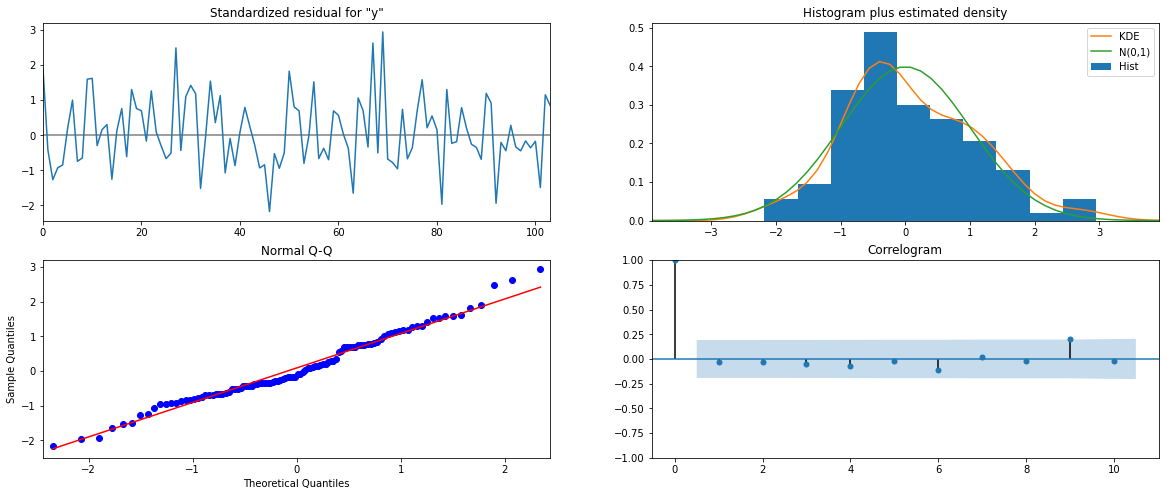

In [539]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [540]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [541]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.87,15.93,31.65,94.09
1,70.54,16.15,38.89,102.19
2,77.36,16.15,45.71,109.01
3,76.21,16.15,44.56,107.86
4,72.75,16.15,41.10,104.40


In [542]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.950025535167992


In [543]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

In [544]:
resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE. 8

#### Manual ARIMA

In [545]:
# Let us look at the ACF and the PACF plots

In [546]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 864x576 with 0 Axes>

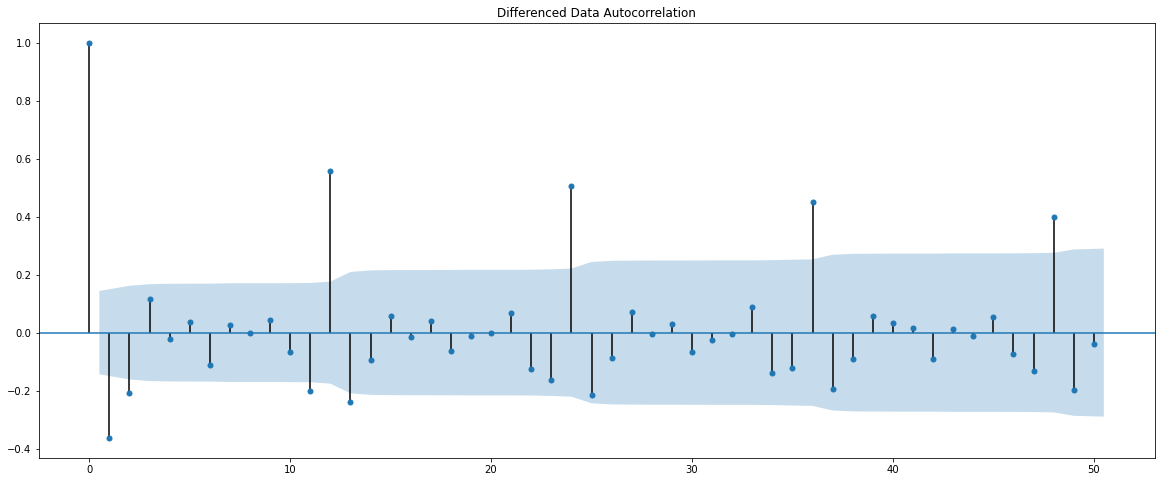

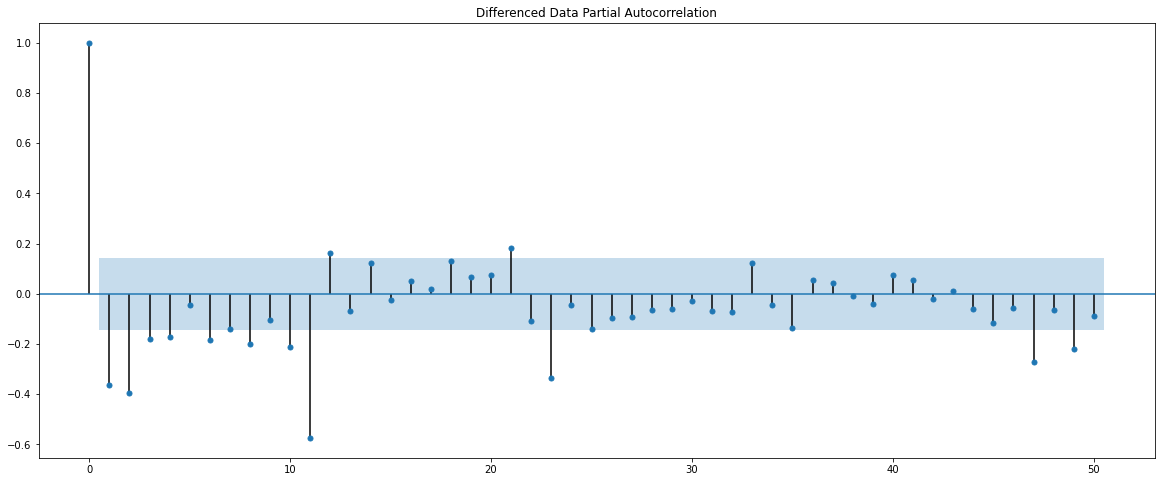

In [547]:
plt.figure(figsize=(12,8))
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()


Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 4 and 2.

In [548]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Tue, 22 Jun 2021   AIC                           1283.753
Time:                        20:46:10   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

Predict on the Test Set using this model and evaluate the model.

In [549]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [550]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.96920076790553


In [551]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


#### SARIMA Model : Manually looking at ACF and PACF

Let us look at the ACF and the PACF plots once more.

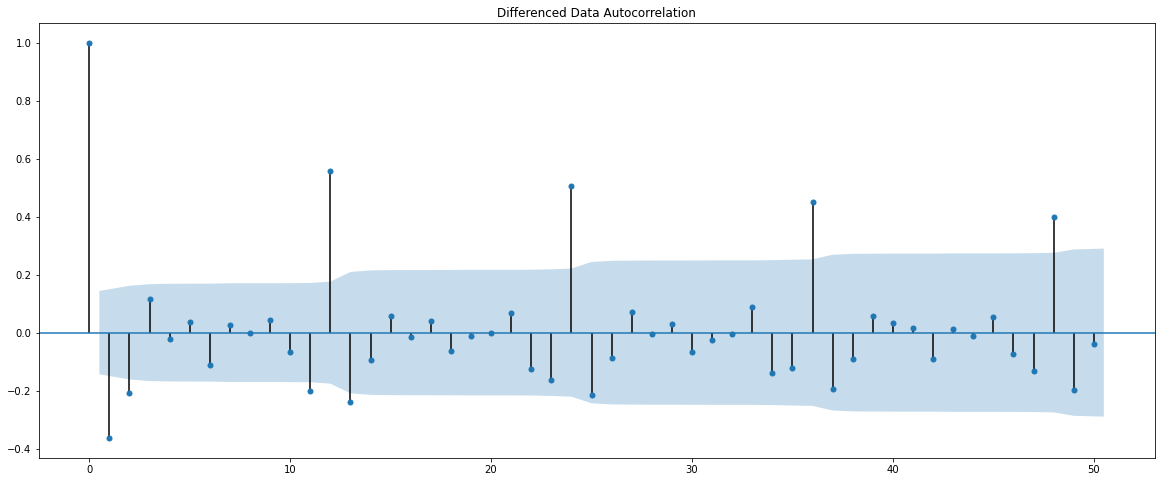

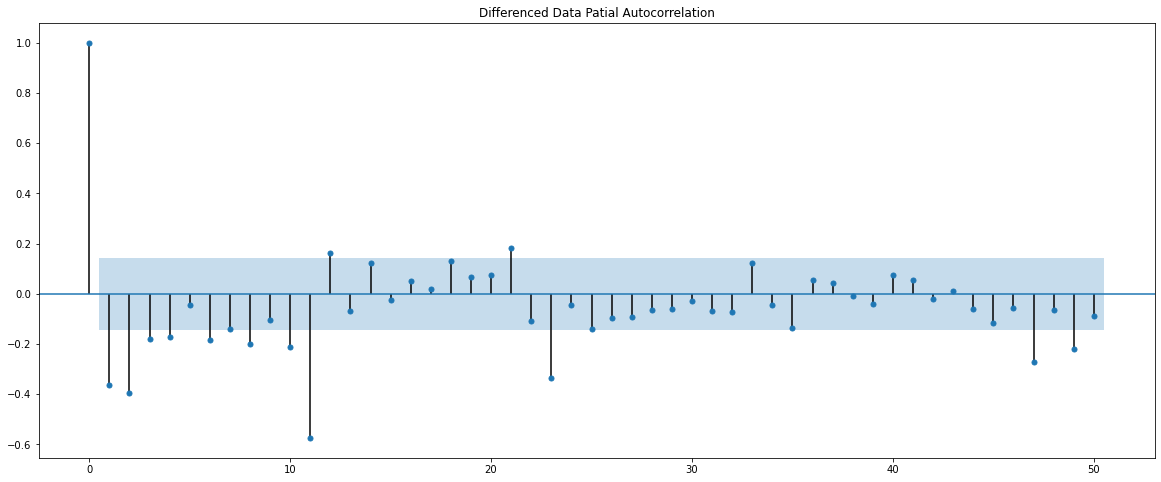

In [552]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

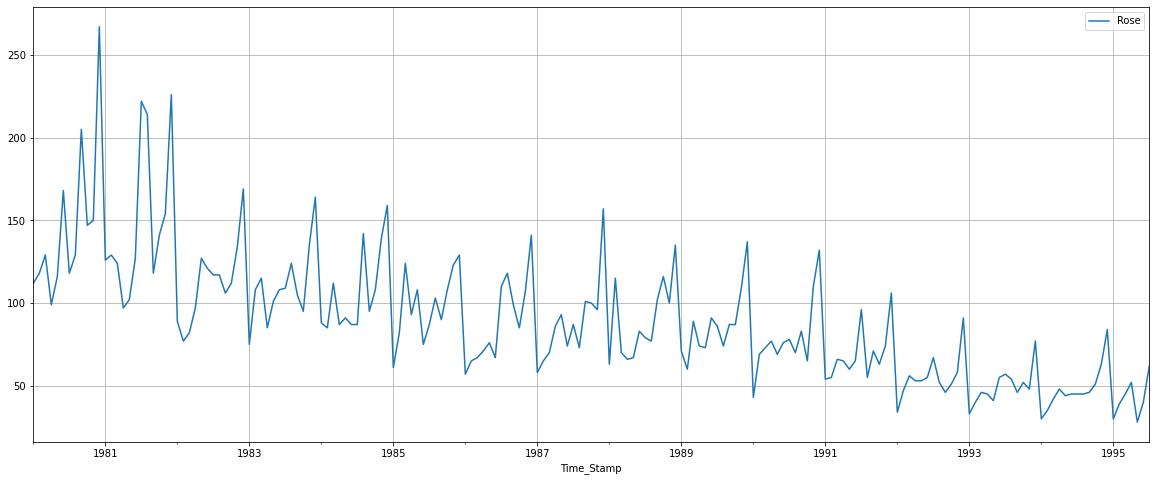

In [553]:
df_rose.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

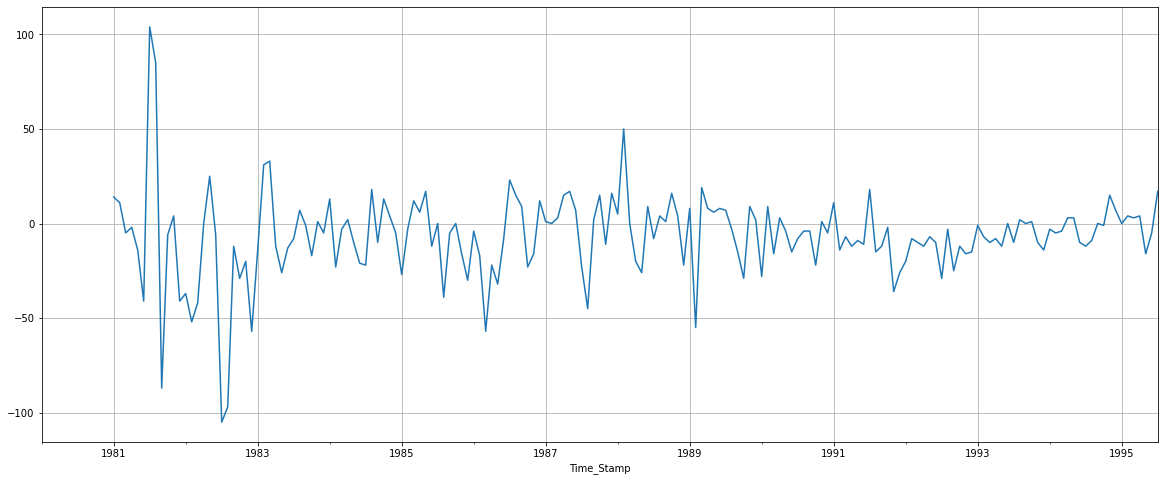

In [554]:
(df_rose['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

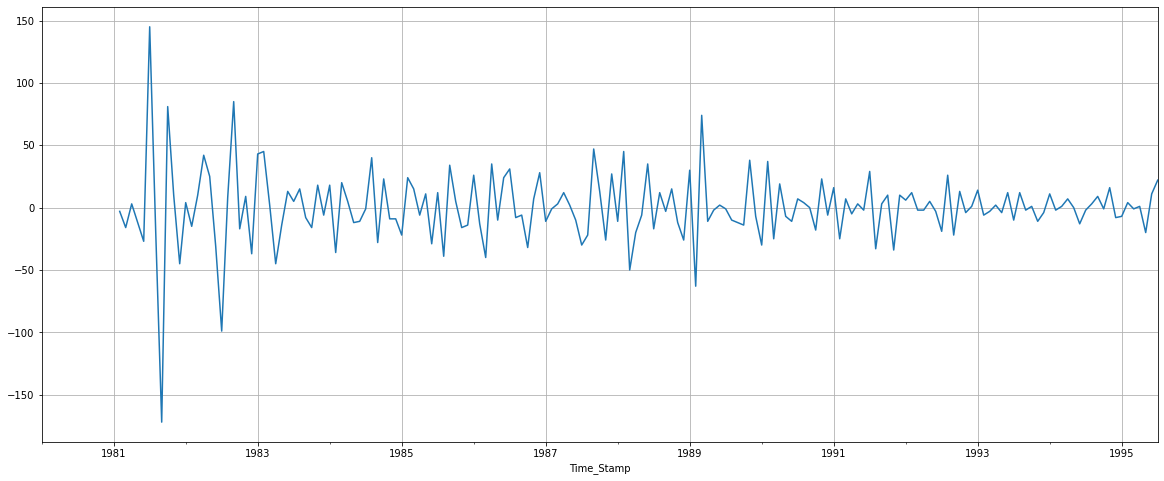

In [555]:
(df_rose['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

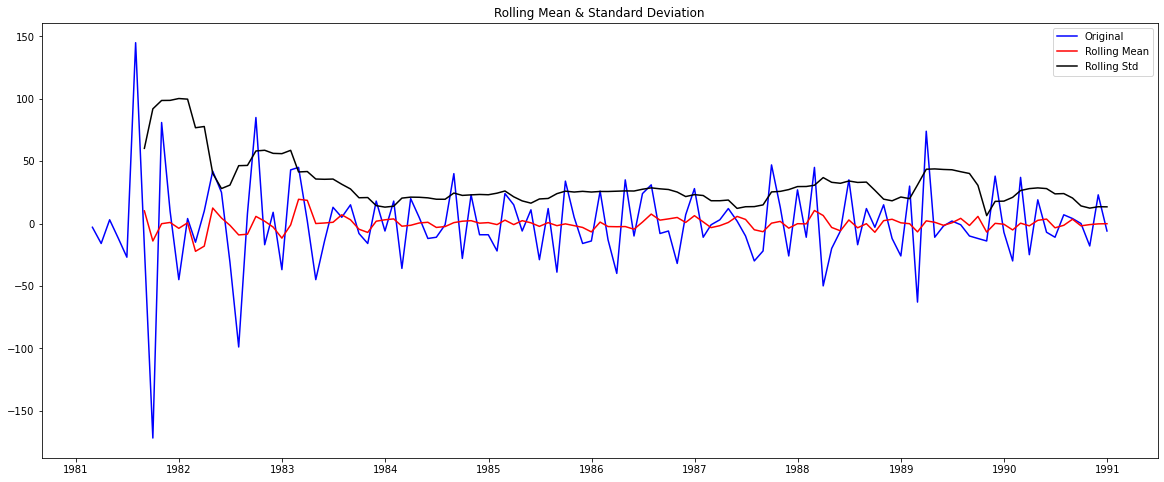

Results of Dickey-Fuller Test:
Test Statistic                 -3.69
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   107.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [556]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

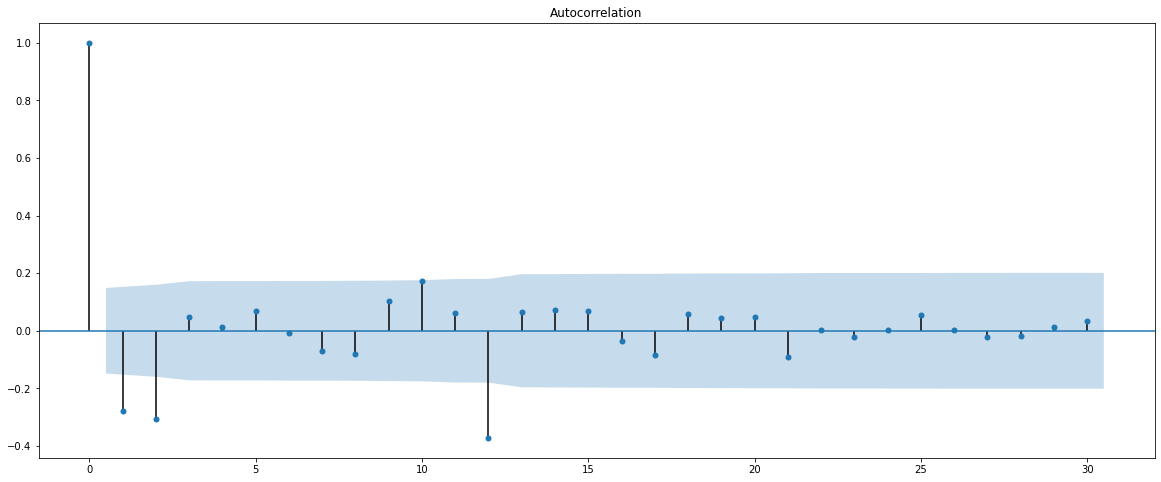

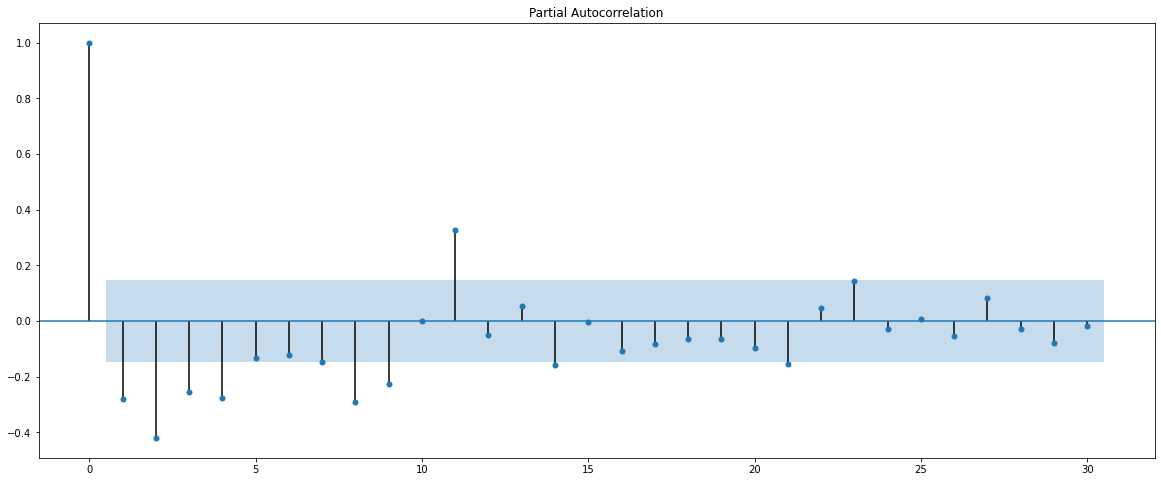

In [557]:
plot_acf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.





In [558]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 4),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -426.513
Date:                                 Tue, 22 Jun 2021   AIC                            875.026
Time:                                         20:46:28   BIC                            903.901
Sample:                                              0   HQIC                           886.718
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5879      0.319      1.844      0.065      -0.037       1

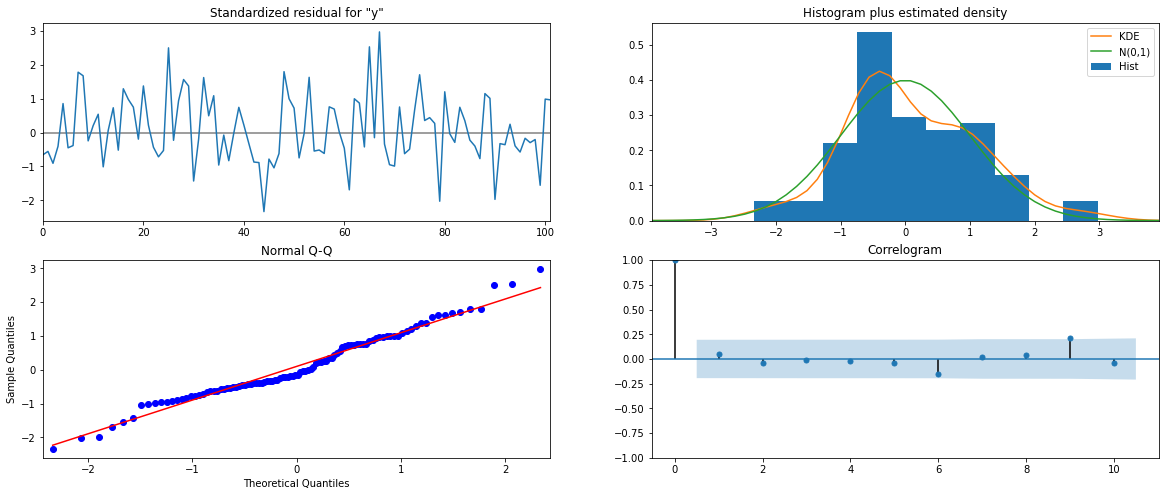

In [559]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

### Predict on the Test Set using this model and evaluate the model.

In [560]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [561]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,61.66,15.59,31.10,92.22
1,70.96,15.64,40.30,101.62
2,76.12,15.65,45.44,106.79
3,75.26,15.65,44.57,105.94
4,72.43,15.66,41.74,103.12


In [562]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.696148760797275


In [563]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,4)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])


resultsDf


,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


## 8.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data. 2

In [564]:
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",36.82
"Alpha=0.3,SimpleExponentialSmoothing",47.53
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.59
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.17
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.95
RegressionOnTime,15.28
NaiveModel,79.74
SimpleAverageModel,53.48
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.46


## 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. 3

If we see all the RMSE, We can Say that Triple exponential Smoothing can perform Well for this series, This series has level, Seasonality and Trend also

In [569]:
Full_model_TES = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [570]:
full_model_TES_autofit = Full_model_TES.fit()

In [591]:
full_model_TES_autofit.params

{'smoothing_level': 0.10670810408409581,
 'smoothing_trend': 4.386089535696353e-08,
 'smoothing_seasonal': 4.6406369545555414e-05,
 'damping_trend': nan,
 'initial_level': 44.80878821492276,
 'initial_trend': -0.17017928788121756,
 'initial_seasons': array([2.40950781, 2.73642394, 3.01847615, 2.69736542, 2.94860714,
        3.1936259 , 3.58257845, 3.6914497 , 3.48628986, 3.44546151,
        3.99944747, 5.51335091]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [594]:
full_model_TES_autofit.summary()

Dep. Variable:,Rose,No. Observations:,187
Model:,ExponentialSmoothing,SSE,48456.867
Optimized:,True,AIC,1071.219
Trend:,Additive,BIC,1122.917
Seasonal:,Multiplicative,AICC,1075.290
Seasonal Periods:,12,Date:,"Tue, 22 Jun 2021"
Box-Cox:,False,Time:,22:05:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1067081,alpha,True
smoothing_trend,4.3861e-08,beta,True


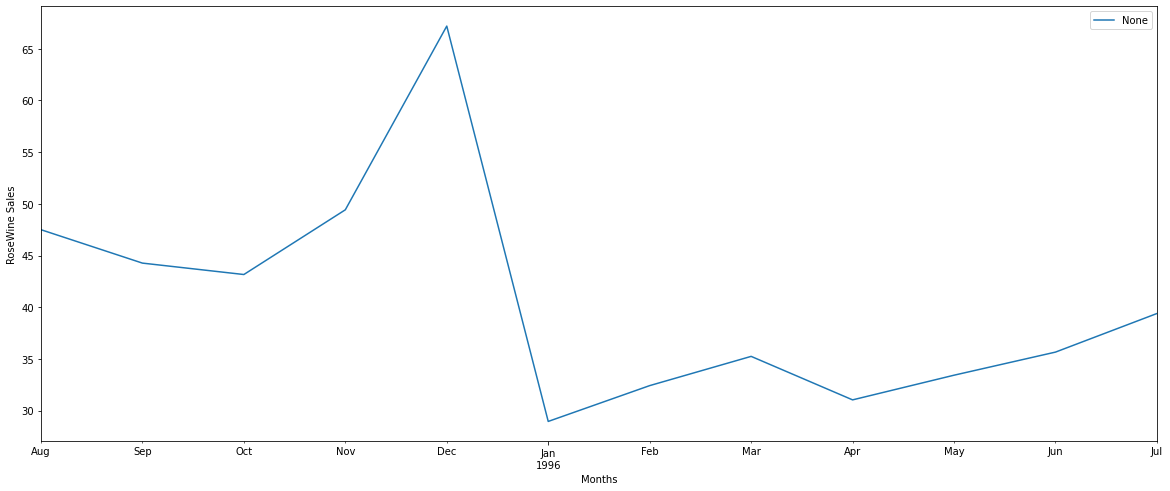

In [629]:
prediction_plot=full_model_TES_autofit.forecast(12).plot()
prediction_plot.set_xlabel('Months')
prediction_plot.set_ylabel('RoseWine Sales')
plt.legend(loc='best')
plt.show()


In [619]:
pred['Sales']=full_model_TES_autofit.forecast(12).to_frame()

In [622]:
pred['Sales'].to_frame()

,Sales
1995-08-31,47.50
1995-09-30,44.27
1995-10-31,43.16
1995-11-30,49.42
1995-12-31,67.19
1996-01-31,28.95
1996-02-29,32.42
1996-03-31,35.25
1996-04-30,31.04
1996-05-31,33.43


## 10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present. 5 

To predict Sales in 12 Months we have studied, Analysed and applied different Models on the existing Data.
While Doing the EDA part we got to know that 
1.There is downward trend, and also series has Seasonality, Trend and Level.

2.There are two missing values, we have filled that with the forward filling method.

3.The sales are High in the month of December,it is might due to Festivals like New year, Christmas.

4.The High Stock should be Ready from the month of August to December.

5.As per Predicted, The Maximum sales are happening in the month of December, and it is around 67, so it will be okay if we got 67 wines in stock in The Dec-1995.

6.Here we come with interseting insights from Monthly plot, From January to October Median of Sales is almost Same. Only Sales are increasing in November and December.In This December Only Sales has Crossed figure of 250 wines.

7.It needs to be analysed further, Why the Sales are Decreasing every passing year. Quality issue, branding, Advertisement issue that can be analysed from different data.

To Predict the Results, We have applied Double,Triple ExponentialSmoothing.	Also applied Regression, NaiveModel, SimpleAverageModel, TrailingMovingAverage, Then automated ARIMA, SARIMA  by comparing AIC values and Manual ARIMA, SARIMA by Partial Autocorrelation Function and Auto-correlation Function plots.

After Applying all the Models, we found that RMSE value for Triple exponential smoothing was a lowest, so we have decided to go with this model. We have applied the whole Data earlier it was Test and Train, we have applied full data, fit the model and then predicted the Next 12 Months Sales and plotted the same.


















